### Sentiment Analysis using Naive Bayes

### Problem Statement
Sentiment analysis is the computational process of identifying and categorizing opinions expressed in text, particularly to determine whether the sentiment conveyed is positive, negative, or neutral. It is widely used in applications such as opinion mining, customer feedback analysis, and social media monitoring.

In this project, we focus on performing sentiment analysis on a dataset of tweets sourced from a Kaggle competition. Each tweet in the training data is labeled with one of three sentiment classes: *positive*, *negative*, or *neutral*. Although the original competition involves identifying a specific "selected text" span that reflects the sentiment, our focus is solely on classifying the **overall sentiment** of the tweet based on its full text.

The primary objective of this project is to build a machine learning model that can accurately predict the sentiment category of a tweet using only its textual content. To achieve this, we will perform the following:

- Load and explore the dataset (`train.csv` and `test.csv`)
- Clean and preprocess the text data to remove noise and standardize the input
- Convert text into numerical representations using techniques like TF-IDF
- Train a **Naive Bayes classifier** on the training data
- Evaluate the model’s performance using appropriate metrics such as accuracy, precision, recall, F1-score, and confusion matrix
- Apply cross-validation to assess model generalizability

This problem is framed as a **multi-class text classification task** where the input is a tweet, and the output is one of three sentiment labels. The insights gained from this analysis can help understand how simple probabilistic models can perform on real-world social media text and lay the foundation for more advanced NLP techniques in future work.

### Dataset Overview

The tweet sentiment dataset was sourced from Kaggle (Kaggle, n.d.) and contains labeled tweets with positive, negative, and neutral sentiments. It consists of tweets annotated with sentiment labels. In the training data, each tweet also includes a word or phrase (known as the "selected text") that best represents the sentiment of the tweet.

This project focuses on understanding the relationship between tweet content and its sentiment classification, using text classification techniques.

**Purpose of the Dataset**

The primary goal of the dataset is to explore sentiment analysis by identifying:

- The **sentiment** of a tweet as one of three categories: *positive*, *negative*, or *neutral*.
- The **textual span** within each tweet that best reflects this sentiment (only available in the training data).

Although the full Kaggle competition task includes predicting the selected text in the test set and submitting results, this project is limited to using only the `train.csv` and `test.csv` files. The submission step and file are not included in the scope of this analysis.

**Files Used**

- `train.csv`: This file contains the full tweet text, sentiment labels, and the selected text that reflects the sentiment.
- `test.csv`: This file contains only the tweet text and sentiment labels. The selected text is not available in this file and is not used for prediction or submission in this project.

**Structure of the Data**

Each row in `train.csv` contains:
- A unique identifier (`textID`)
- The text of a tweet
- The sentiment label (*positive*, *negative*, or *neutral*)
- The selected portion of the text that best expresses the sentiment

The `test.csv` file contains:
- A unique identifier (`textID`)
- The text of a tweet
- The sentiment label

When working with this data, it's important to preprocess the text carefully. One critical step is to remove the beginning and ending quotation marks from the text field, as they are not part of the original tweet content and can interfere with accurate model training.

**What Are We Predicting?**

In this project, we aim to classify the sentiment of a tweet based on its text. Although the original competition task involves extracting a specific word or phrase, our focus is solely on sentiment classification using the text of the tweet as input and the sentiment label as the target.

This simplifies the problem to a multi-class classification task where each tweet is assigned one of three possible sentiment classes.

**Insights to Be Gained**

By applying classification techniques to this dataset, we aim to gain insights into:

- How language patterns correspond to different sentiments
- Whether a simple and interpretable model like Naive Bayes can effectively classify tweet sentiments
- What challenges arise when working with short, informal, and noisy text data like tweets

The goal is to build a model that can generalize well to unseen tweets and provide meaningful predictions based on textual features.


### Algorithm of the Solution

In this sentiment analysis project, we will use the **Multinomial Naive Bayes** algorithm, which is one of the most popular and effective methods for text classification tasks such as spam detection, news categorization, and sentiment prediction.

**What is Naive Bayes?**

Naive Bayes is a **probabilistic classification algorithm** based on **Bayes' Theorem**, which describes how to update the probabilities of hypotheses when given evidence. It is called “naive” because it makes a strong assumption: it assumes that all features (in this case, words or tokens) are **independent** of each other given the class label. This assumption rarely holds in practice but still often leads to good results in text classification.

The classifier works by calculating the **posterior probability** of each class given the input features and selecting the class with the highest probability.

Bayes' Theorem is defined as:

$$
P(c \mid x) = \frac{P(x \mid c) \cdot P(c)}{P(x)}
$$

Where:
- $P(c \mid x)$ is the posterior probability of class $c$ given the feature vector $x$
- $P(x \mid c)$ is the likelihood of the feature vector $x$ given class $c$
- $P(c)$ is the prior probability of class $c$
- $P(x)$ is the probability of the feature vector $x$

In our context:
- The **feature vector $x$** is the numerical representation of a tweet's text content (e.g., a vector of term frequencies or TF-IDF scores)
- The **class label $c$** is the sentiment of the tweet, which can be **positive**, **negative**, or **neutral**

**Feature and Label Description**

In this classification task:
- The **features** are derived from the tweet’s `text` column after text preprocessing. These include word frequencies or TF-IDF scores extracted using `TfidfVectorizer`.
- The **label** is the `sentiment` column, which represents the overall emotion or opinion in the tweet. It is a categorical variable with three possible values:
  - Neutral (0)
  - Negative (1)
  - Positive (2)

**Why Multinomial Naive Bayes?**

There are several variations of Naive Bayes classifiers. We choose the **Multinomial Naive Bayes** model because:
- It is well-suited for **discrete features** like word counts or TF-IDF values
- It performs well in text classification where features are based on frequency of words

**Steps in Applying the Algorithm**

1. **Preprocessing the Text Data**:
   - Clean the raw tweets by lowercasing, removing punctuation, stopwords, URLs, etc.
   - Tokenize and lemmatize to normalize words
   - Text preprocessing was performed using the Natural Language Toolkit (Bird et al., 2009) to clean and normalize the tweets.

2. **Vectorizing the Text**:
   - Convert the cleaned text into numerical form using `TfidfVectorizer`
   - This transforms text into a sparse matrix where each column represents a term, and each value is the TF-IDF score of that term in a given tweet

3. **Splitting the Data**:
   - Divide the dataset into training and validation sets using `train_test_split`
   - This allows us to evaluate model performance on unseen data
   - In this case there are two separate csv files, `train.csv` and `test.csv`, which are used for training and testing respectively

4. **Training the Classifier**:
   - Use `MultinomialNB` from scikit-learn to fit the model on the training data
   - The classifier learns the prior probabilities of each class and the conditional probabilities of each word given the class

5. **Making Predictions**:
   - Predict sentiment labels for the validation set
   - The model assigns the class with the highest posterior probability to each tweet

6. **Evaluating the Model**:
   - Use metrics such as accuracy, precision, recall, F1-score, and a confusion matrix
   - These help assess how well the classifier distinguishes between different sentiment categories

**Intuition Behind the Math**

The algorithm essentially asks: *“Given the words in this tweet, which sentiment is most likely?”* It does this by computing the probability of the tweet belonging to each class based on:
- How common each class is in the training data (the prior $P(c)$)
- How likely the words in the tweet are to appear in that class (the likelihood $P(x \mid c)$)

Even though the model assumes word independence, which is clearly not always true in natural language, it still tends to perform well due to the high-dimensional nature of text data.

**Key Assumptions**

- **Feature Independence**: The model assumes that words in a tweet are conditionally independent given the sentiment label.
- **Feature Relevance**: Each word contributes independently and equally to the outcome.
- **Sufficient Data**: Naive Bayes works best when the training data sufficiently represents the distribution of words across different classes.

Despite these assumptions being unrealistic for human language, Naive Bayes remains a strong and interpretable baseline for many NLP tasks, including sentiment analysis.



### Data Loading and Exploration
In this step, we import all the necessary Python libraries, load the dataset into a pandas DataFrame, and perform an initial statistical and structural examination of the data. This early exploration provides insight into the overall composition and quality of the dataset, guiding us in how to prepare it for modeling.

The dataset contains tweets and their associated sentiment labels. By exploring it, we aim to understand the following:

- The number of entries (rows) and features (columns)
- The types of data contained in each column
- The distribution of sentiment labels (positive, negative, neutral)
- The presence of any missing (null) values
- The structure and characteristics of the tweet text, such as:
  - Tweet length (number of characters or words)
  - Common terms or word clouds (optional for visualization)
  - Examples of tweets from each sentiment class

This initial understanding is essential for determining:
- Whether the dataset is balanced across sentiment categories
- How much cleaning the text requires
- Which preprocessing steps will be most important

By performing a thorough exploration, we ensure a strong foundation for the steps that follow in preprocessing and modeling.

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import contractions

#for model-building
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer

# # Ensure nltk resources are downloaded
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger_eng')
# nltk.download('wordnet')

In [103]:
# Loading the dataset
train_df = pd.read_csv('/Users/mohini/PycharmProjects/scientificProject/DSC-540_codes/Tweet_Sentiment/train.csv')
test_df = pd.read_csv('/Users/mohini/PycharmProjects/scientificProject/DSC-540_codes/Tweet_Sentiment/test.csv')

In [104]:
# Displaying the first few rows of the training dataset
train_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [105]:
# Displaying the first few rows of the test dataset
test_df.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [106]:
# Printing the shape of the training and test datasets
print("Shape of the training dataset:", train_df.shape)
print("Shape of the test dataset:", test_df.shape)

Shape of the training dataset: (27481, 4)
Shape of the test dataset: (3534, 3)


In [107]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [108]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


**Dataset Shape and Structure**

Understanding the shape of the dataset is an important first step in data exploration, as it tells us how many samples (rows) we have to work with and how many features (columns) are available.

- **Shape of the training dataset:** `(27481, 4)`  
  This means the training dataset contains **27,481 tweets**, each represented by **4 columns**:
  - `textID`: A unique identifier for each tweet.
  - `text`: The full content of the tweet.
  - `sentiment`: The label representing the sentiment (positive, negative, or neutral).
  - `selected_text`: A substring of the tweet that best reflects the sentiment (used as the target for training).

- **Shape of the test dataset:** `(3534, 3)`  
  The test dataset includes **3,534 tweets** with **3 columns**:
  - `textID`: A unique identifier.
  - `text`: The tweet content.
  - `sentiment`: The sentiment label provided (but no `selected_text` column).

Since the **test dataset does not include the `selected_text`**, it's meant to be used for **evaluation or submission**, where the task is to predict the most sentiment-representative span from each tweet. However, in this project, we are only using the training data to perform classification based on the overall sentiment (positive, negative, or neutral) of the full tweet text, so we will be using `text` and `sentiment` columns from both datasets.

By knowing the number of rows and the features available in each set, we can effectively plan for preprocessing, feature extraction, model training, and evaluation.


In [109]:
# Checking for null values in the training dataset
train_df.isnull().sum() 

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

We found the following:

- textID: No missing values. This column serves as a unique identifier and is not used in model training.
- text: 1 missing value. Since this is the main input feature (the tweet itself), any missing value here should be dropped — a model cannot learn from missing text.
- selected_text: 1 missing value. Although we are not using this column in our sentiment classification task, it's still good practice to be aware of its cleanliness. For this task, it can be ignored or dropped.
- sentiment: No missing values. This is our target label, so it's good that the dataset is fully labeled.

In [110]:
# Removing the null values from the training dataset
train_df = train_df.dropna(how='any', axis=0)

In [111]:
# Checking the shape of the training dataset after removing null values
print("Shape of the training dataset after removing null values:", train_df.shape)

Shape of the training dataset after removing null values: (27480, 4)


### Data Preprocessing

Preprocessing is a vital step in preparing raw text data for machine learning models. Tweets are typically informal, noisy, and full of inconsistencies like abbreviations, emojis, special characters, and inconsistent casing. To ensure our model receives clean and meaningful input, we perform the following sequential preprocessing steps:

- **Lowercasing**: Convert all characters in the tweet to lowercase. This helps avoid treating words like “Happy” and “happy” as different tokens.
- **Removing HTML Tags**: Eliminate any embedded HTML tags using regular expressions.
- **Removing Punctuation and Special Characters**: Strip out punctuation marks and special symbols that are generally not helpful for sentiment classification.
- **Whitespace Normalization**: Replace multiple consecutive whitespace characters with a single space.
- **Removing Digits**: Numbers are removed as they typically don’t contribute significantly to sentiment.
- **Removing URLs**: Any hyperlinks or web addresses are removed since they do not carry sentiment-specific meaning.
- **Removing Emojis and Non-ASCII Characters**: Emojis and other non-text characters are stripped out to keep the input clean and model-friendly.
- **Expanding Contractions**: English contractions like “don’t” or “I’m” are expanded to “do not” and “I am” using the contractions library, improving tokenization and lemmatization.
- **Stopword Removal**: Common English stopwords (like "and", "the", "is", etc.) are removed to reduce noise and focus on content-carrying words.
- **Lemmatization with POS Tagging**: Each word is reduced to its base or dictionary form (e.g., "running" → "run") using WordNet Lemmatizer. Part-of-speech (POS) tags are applied to improve lemmatization accuracy by distinguishing verbs, adjectives, etc.

The final output from this process is a cleaner, lower-dimensional representation of the original tweet text, which preserves its core sentiment-related content and is well-suited for machine learning.


In [112]:
# Pre-processing function: Lowercasing, stripping, and removing punctuations
def preprocess(text):
    text = text.lower().strip()
    text = re.sub('<.*?>', '', text)  # Remove HTML tags
    text = re.sub(f"[{re.escape(string.punctuation)}]", ' ', text)  # Remove punctuations
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\d', ' ', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.encode('ascii', 'ignore').decode()  # Remove emojis and non-ASCII
    text = contractions.fix(text)  # Expand contractions
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    return text

# Stopword Removal
def stopword(string):
    stop_words = set(stopwords.words('english'))
    words = [word for word in string.split() if word not in stop_words]
    return ' '.join(words)

# Initialize Lemmatizer
wl = WordNetLemmatizer()

# Helper function to map NLTK POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenization and Lemmatization
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string))  # Get POS tags
    words = [wl.lemmatize(word, get_wordnet_pos(tag)) for word, tag in word_pos_tags]
    return " ".join(words)

In [113]:
# Final pre-processing function
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

In [114]:
# Apply the function to the train dataset
train_df['clean_text'] = train_df['text'].apply(finalpreprocess)
train_df.head()

,textID,text,selected_text,sentiment,clean_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,respond go
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad miss san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,bos bully
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,son put release already buy


In [115]:
# Apply the function to the test dataset
test_df['clean_text'] = test_df['text'].apply(finalpreprocess)
test_df.head()

,textID,text,sentiment,clean_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,last session day http twitpic com ezh
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,shanghai also really excite precisely skyscrap...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,recession hit veronique branquinho quit compan...
3,01082688c6,happy bday!,positive,happy birthday
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,http twitpic com w p like


### Data Cleaning and Handling Unusual Phenomena

After completing initial text preprocessing steps such as lowercasing, stopword removal, and lemmatization, we further examine the dataset to detect and handle irregularities that might affect the performance of our sentiment classification model. This step helps ensure data consistency, understand class behavior, and identify patterns that guide feature engineering.

**Normalization and Feature Scaling**  
Since we are using the Multinomial Naive Bayes classifier, which is based on word frequencies, explicit normalization or feature scaling of features is not necessary. These models rely on the relative occurrence of words rather than absolute magnitude. However, for other classifiers like SVM or Logistic Regression, normalization of numerical features could improve performance.

**Analyzing Tweet Lengths**  
Tweets can differ significantly in length. Very short tweets may not provide enough context for sentiment classification, while very long tweets may introduce noise or multiple sentiments. We analyzed tweet lengths to understand this variation.

We plotted a histogram and a boxplot of the tweet lengths based on the number of words in the preprocessed text.

- The histogram showed that most tweets are relatively short, with a peak around 10 to 20 words. This distribution is expected since Twitter imposes a character limit on tweets.
- The boxplot revealed a few outliers with significantly longer word counts. These outliers might affect model training and could be truncated or examined further if needed.

**Sentiment Class Distribution**  
To check for class imbalance, we plotted the count of tweets per sentiment category.

- The distribution showed that the 'neutral' class is slightly more common than 'positive' and 'negative', though not severely imbalanced.
- In such cases, Naive Bayes generally performs reasonably well without resampling. However, if more imbalance is observed in a larger or different dataset, techniques like class weighting or oversampling might be necessary.

**Word Cloud Analysis by Sentiment**  
To understand the most common terms associated with each sentiment class, we generated separate word clouds for positive, negative, and neutral tweets. Word clouds help visualize the frequency of words in a class by displaying more frequent words in larger font.

- In positive tweets, words like "love", "great", and "happy" were prominent.
- In negative tweets, terms like "hate", "bad", "sad", and "worst" were commonly seen.
- Neutral tweets mostly contained generic or context-specific terms without strong emotion.

These word clouds help validate that the preprocessing pipeline is working and that word-level sentiment cues are preserved.

**Average Word Count by Sentiment**  
We also calculated the average number of words in tweets for each sentiment:

- Neutral tweets: typically longer and more descriptive
- Negative tweets: often shorter and more direct
- Positive tweets: moderately sized with expressive tone

Understanding these patterns supports feature engineering and highlights the importance of tweet length in classification.

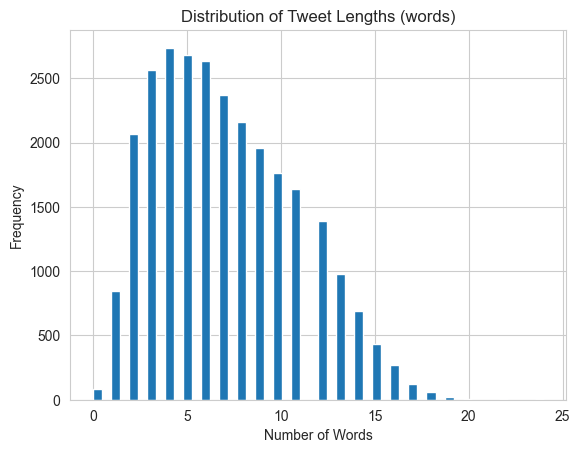

In [117]:
# Distribution of Tweet Lengths
train_df['tweet_len'] = train_df['clean_text'].apply(lambda x: len(x.split()))
plt.hist(train_df['tweet_len'], bins=50)
plt.title('Distribution of Tweet Lengths (words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

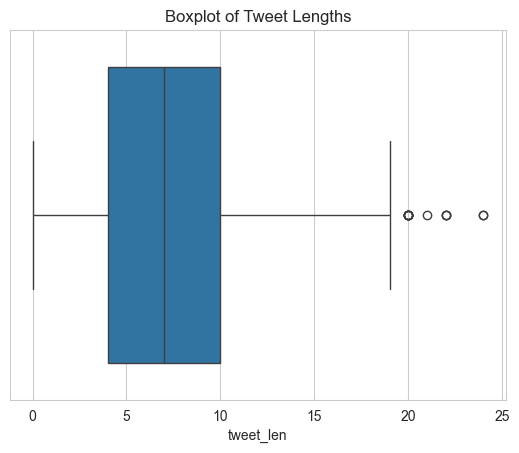

In [118]:
# Boxplot of tweet lengths
sns.boxplot(x=train_df['tweet_len'])
plt.title('Boxplot of Tweet Lengths')
plt.show()

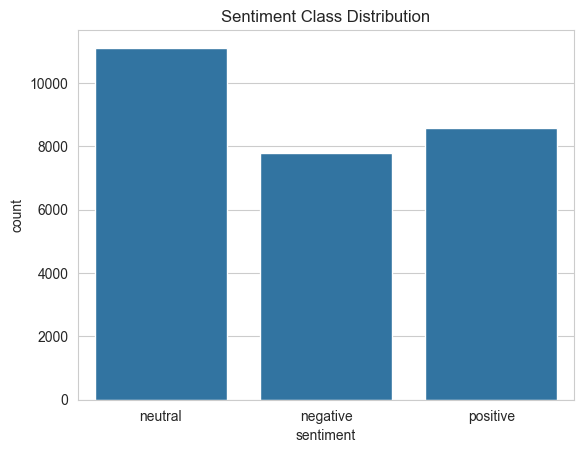

In [119]:
sns.countplot(data=train_df, x='sentiment')
plt.title('Sentiment Class Distribution')
plt.show()

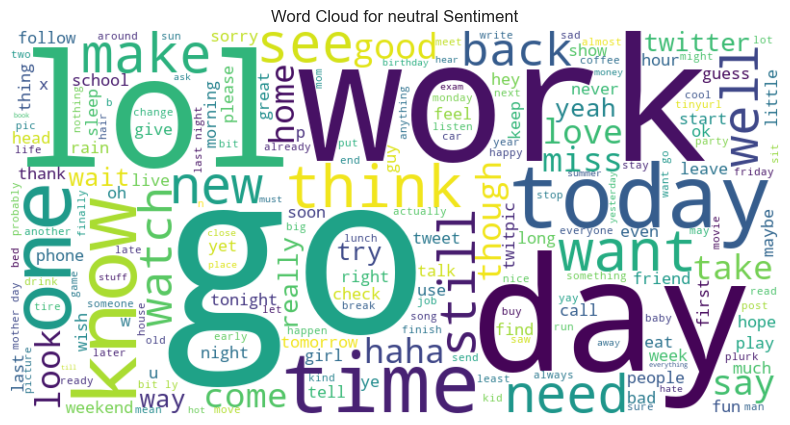

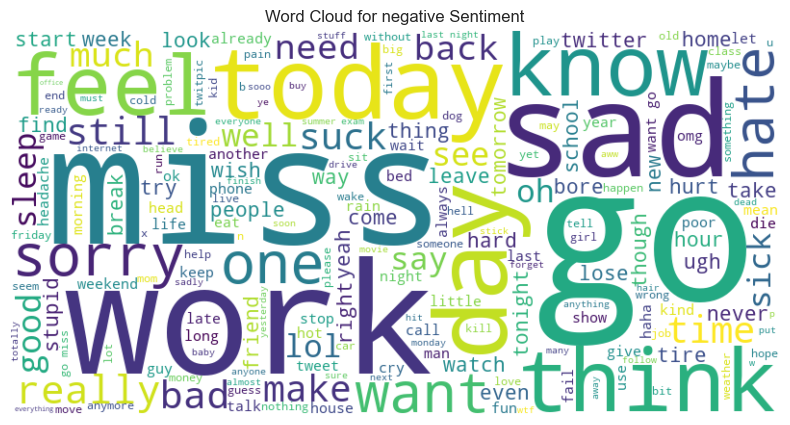

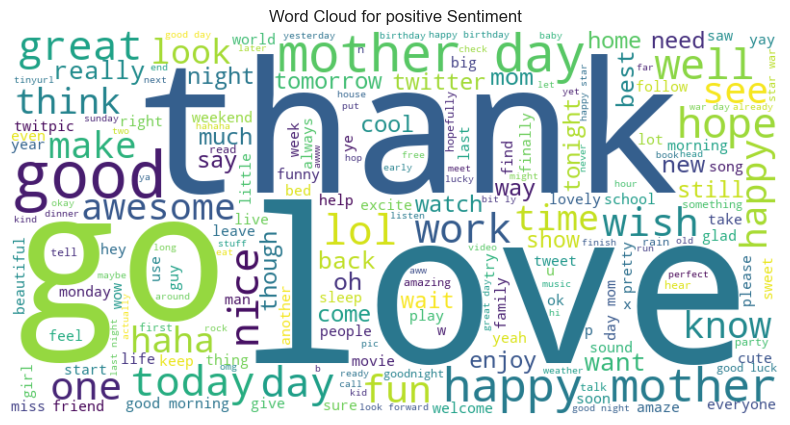

In [121]:
from wordcloud import WordCloud

sentiments = train_df['sentiment'].unique()
for sentiment in sentiments:
    text = ' '.join(train_df[train_df['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()


In [122]:
train_df.value_counts('sentiment')

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

In [123]:
# Number of words in a tweet
train_df['word_count'] = train_df['text'].apply(lambda x: len(str(x).split()))

print(f"Average number of words in the neutral tweet: {train_df[train_df['sentiment']=='neutral']['word_count'].mean():.1f}")

print(f"Average number of words in the negative tweet: {train_df[train_df['sentiment']=='negative']['word_count'].mean():.1f}")

print(f"Average number of words in the positive tweet: {train_df[train_df['sentiment']=='positive']['word_count'].mean():.1f}")


Average number of words in the neutral tweet: 12.3
Average number of words in the negative tweet: 13.5
Average number of words in the positive tweet: 13.1


### Interpretation of the Graphs

We interpret the visualizations generated, focusing on tweet length distribution and sentiment class balance.

**Distribution of Tweet Lengths (Histogram)**

The histogram illustrates how tweet lengths are distributed based on the number of words:

- Most tweets range between **3 to 12 words**, with the highest frequency observed around **4 to 6 words**.
- The distribution is **right-skewed**, indicating that the majority of tweets are short, with fewer long messages.
- Tweets with only 1 word or more than 20 words are relatively **rare**, showing that the dataset is dominated by concise messages.

This aligns with the nature of Twitter, where short, direct expressions are common.

**Boxplot of Tweet Lengths**

The boxplot provides a statistical summary of tweet lengths:

- The **median tweet length** is approximately **8 words**.
- The **interquartile range (IQR)** spans from about **4 to 12 words**, meaning that 50% of tweets fall within this range.
- A small number of **outliers** exceed 20 words, which may carry more complex sentiment but occur infrequently.

However, the tweets are short, consistent with Twitter's character constraints, and this compact structure should guide the design of the feature extraction pipeline.

**Sentiment Class Distribution (Countplot)**

The countplot shows the frequency of each sentiment label:

- **Neutral:** 11,117 tweets (most frequent)
- **Positive:** 8,582 tweets
- **Negative:** 7,781 tweets

While the dataset is **not perfectly balanced**, the disparity is moderate. The **neutral class** is about **1.4 times more common** than the negative class, indicating a **mild class imbalance**.

This level of imbalance typically does not impair model performance significantly, especially for Multinomial Naive Bayes. However, if skewed results are observed during evaluation, techniques like **class weighting** or **resampling** may be applied.


**There is no need for normalization or feature scaling as it is not required for Multinomial Naive Bayes (MNB)**. Following are the reasons:

- MNB expects **discrete frequency-based features**, such as word counts or term frequency scores.
- When using `CountVectorizer` or `TfidfVectorizer`, the output is already in an appropriate format for MNB.
- Applying normalization techniques like `MinMaxScaler` or `StandardScaler` can **distort the distribution** and violate the assumptions of MNB.

Thus, scaling is **not recommended** and **unnecessary** for text features processed through frequency-based encodings.

**Average Tweet Length by Sentiment**

We computed the **average number of words per tweet** for each sentiment class:

- **Neutral:** 12.3 words  
- **Negative:** 13.5 words  
- **Positive:** 13.1 words  

These findings suggest that:

- **Negative tweets** tend to be slightly longer, possibly due to elaboration or emphasis in expressing dissatisfaction.
- **Neutral tweets** are often more descriptive and informational.
- **Positive tweets** are moderately long, often expressive but concise.

These differences in tweet length per sentiment may provide **useful features** during modeling or could inspire **feature engineering** ideas, such as including length as an auxiliary feature.

Overall the following inferences can be drawn:
- Tweets are generally **short**, with a small number of outliers.
- The **sentiment classes are moderately imbalanced**, but not severely enough to require major correction.
- Word count distributions and word clouds support that **distinct sentiment vocabularies** exist.
- **No normalization** of text-based features is needed when using Multinomial Naive Bayes.
- Average tweet lengths vary by sentiment, which may reflect **linguistic differences** in expression across classes.

### Questions Answered by the Model

By applying the Naïve Bayes classification algorithm to the tweet dataset, we aim to answer the following key questions:

1. **Can we predict the sentiment of a tweet based on its text content?**  
   This is the primary classification task. Using cleaned and vectorized tweet text, the model learns patterns in word usage that correspond to sentiment categories — neutral, negative, or positive.

2. **Which sentiment class is easiest or hardest to predict accurately?**  
   By analyzing model performance metrics (such as accuracy, precision, recall, and confusion matrix), we can identify which sentiment the model predicts reliably and which sentiments tend to be misclassified. This helps in understanding vocabulary overlap and potential class imbalance.


### Choice of Naïve Bayes Algorithm

We use the **Multinomial Naïve Bayes** classifier for this project.

**Reasoning:**

- The Multinomial Naïve Bayes algorithm is specifically designed for **discrete features** like word counts or term frequencies, which are common in **text classification** tasks.
- Our input features are generated using **TF-IDF vectorization**, which transforms the tweet text into numerical vectors representing term frequencies scaled by inverse document frequencies.
- Unlike Gaussian Naïve Bayes, which assumes continuous data and a normal distribution, or Bernoulli Naïve Bayes, which is better suited for binary features (presence/absence of words), **Multinomial Naïve Bayes** is most appropriate for handling the type of input produced by TF-IDF or CountVectorizer.

This makes Multinomial Naïve Bayes the best fit for predicting tweet sentiment based on textual content in our case.


### Preparing Data for Modeling

Once the dataset is cleaned and preprocessed, we proceed with preparing it for model training. This involves two main steps: encoding the target labels and converting the text into numerical feature vectors.

#### 1. Encoding Sentiment Labels

The sentiment column originally contains categorical labels in text format: `'neutral'`, `'negative'`, and `'positive'`. To train machine learning models, we first convert these into numeric codes using label mapping:

- **Neutral → 0**  
- **Negative → 1**  
- **Positive → 2**

This numerical encoding transforms the sentiment labels into a format suitable for classification algorithms. Both the training and testing datasets are updated with these encoded labels.

#### 2. Text Vectorization using TF-IDF

After encoding the target variable, we apply **TF-IDF (Term Frequency–Inverse Document Frequency) Vectorization** to the `clean_text` column. This converts the cleaned tweet text into high-dimensional numerical feature vectors.

The TF-IDF vectorizer assigns a weight to each term based on:

- **How frequently the term appears in a tweet (TF)**  
- **How rare the term is across the entire corpus (IDF)**

The idea is to emphasize unique, informative words and de-emphasize commonly used terms that are less useful for distinguishing between sentiments.

The vectorization process results in two sparse matrices:

- `X_train_tfidf`: TF-IDF feature matrix for the training set  
- `X_test_tfidf`: TF-IDF feature matrix for the test set

These matrices serve as input features for the classifier.

#### 3. Final Feature and Label Assignment

- `X_train_tfidf` and `X_test_tfidf` are the transformed feature sets.
- `y_train` and `y_test` hold the corresponding encoded sentiment labels.

With these steps, the dataset is now fully transformed and ready for model training and evaluation.


In [89]:
# Converting the target variable (Sentiment) into numerical values
train_df['sentiment'] = train_df['sentiment'].map({'neutral': 0, 'negative': 1, 'positive': 2})
test_df['sentiment'] = test_df['sentiment'].map({'neutral': 0, 'negative': 1, 'positive': 2})

In [94]:
# Bag-of-words using tfidf vectorizer
tfidf= TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(train_df['clean_text'])
X_test_tfidf = tfidf.transform(test_df['clean_text'])

In [95]:
y_train= train_df['sentiment']
y_test= test_df['sentiment']

### Model Training and Validation

We trained a **Multinomial Naive Bayes** classifier using TF-IDF vectorized features derived from the cleaned tweet text. The target sentiment labels were encoded as:

- Neutral → 0  
- Negative → 1  
- Positive → 2  

After fitting the model on the training set, we evaluated its predictions on the test set using several performance metrics:

- **Accuracy:** Measures overall correctness.
- **Precision:** Measures correctness for each class.
- **Recall:** Measures completeness for each class.
- **F1-score:** Harmonic mean of precision and recall; useful for imbalanced datasets.
- **Confusion Matrix:** Visualizes the correct vs. incorrect predictions per class.

In [96]:
# Fitting the classification model using Naive Bayes (tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [97]:
# Predicting the sentiment using the Naive Bayes model
y_predict_nb_tfidf = nb_tfidf.predict(X_test_tfidf)
y_prob_nb_tfidf = nb_tfidf.predict_proba(X_test_tfidf)[:,1]

print(classification_report(y_test,y_predict_nb_tfidf))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict_nb_tfidf))

              precision    recall  f1-score   support

           0       0.55      0.81      0.65      1430
           1       0.75      0.44      0.55      1001
           2       0.77      0.57      0.66      1103

    accuracy                           0.63      3534
   macro avg       0.69      0.61      0.62      3534
weighted avg       0.67      0.63      0.63      3534

Confusion Matrix: [[1163  116  151]
 [ 524  439   38]
 [ 440   30  633]]


### Model Performance Evaluation

The classification report shows the following results:

- For **Class 0 (Negative Sentiment)**:  
  - Precision is 0.55  
  - Recall is high at 0.81  
  - F1-score is 0.65  
  - Support: 1,430 samples  
  This indicates the model is effective at identifying negative tweets (high recall), but also has many false positives (moderate precision).

- For **Class 1 (Neutral Sentiment)**:  
  - Precision is 0.75  
  - Recall is low at 0.44  
  - F1-score is 0.55  
  - Support: 1,001 samples  
  The model is conservative in predicting neutral tweets—it is precise when it does, but misses many actual neutral tweets.

- For **Class 2 (Positive Sentiment)**:  
  - Precision is 0.77  
  - Recall is 0.57  
  - F1-score is 0.66  
  - Support: 1,103 samples  
  Performance is fairly balanced for positive tweets, with strong precision and moderate recall.

Overall accuracy is **63%** on the test set. The macro average F1-score is **0.62**, and the weighted average F1-score is **0.63**, indicating moderate performance across all classes.

**Confusion Matrix Interpretation**

The confusion matrix is as follows:

- **Class 0 (Negative)**:  
  - 1,163 tweets correctly predicted  
  - 116 misclassified as neutral  
  - 151 misclassified as positive  

- **Class 1 (Neutral)**:  
  - 439 tweets correctly predicted  
  - 524 misclassified as negative  
  - 38 misclassified as positive  

- **Class 2 (Positive)**:  
  - 633 tweets correctly predicted  
  - 440 misclassified as negative  
  - 30 misclassified as neutral  

**Inference and Reasoning**

1. The model performs **best at capturing negative tweets**, likely due to more distinct or stronger sentiment cues. Its high recall for this class shows it rarely misses negative content.

2. **Neutral tweets are the hardest to classify correctly**, with a recall of only 0.44. Over half of neutral tweets are being misclassified—primarily as negative. This may be due to:
   - Overlapping vocabulary between neutral and negative tweets
   - Short tweet lengths reducing contextual clarity
   - Ambiguity in how some neutral expressions are phrased

3. **Positive sentiment classification is decent**, though around 40% of actual positive tweets are still misclassified, mostly as negative.

4. The model seems to show a **bias toward predicting negative sentiment**, as seen by the high number of tweets from other classes (neutral and positive) being misclassified into class 0.

**Suggestions for Improvement**

- Enhance text features using **TF-IDF vectorization** or **n-grams** to capture more context.
- Address the mild class imbalance by using **class weights** or **resampling techniques**.
- Improve preprocessing by incorporating **sentiment-specific features**.




### K-Fold Cross Validation

To avoid overfitting to a single split, we apply **5-fold cross-validation**. The dataset is split into 5 parts, and the model is trained and validated 5 times—once on each fold. 

We report the average metrics across all folds, giving a more robust estimate of model performance.


In [99]:
# Cross-validation score
cv_scores = cross_val_score(nb_tfidf, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")


Cross-Validation Accuracy Scores: [0.61590247 0.61189956 0.62590975 0.62117904 0.62736536]
Mean Accuracy: 0.6205


Cross-Validation Accuracy: The model maintained consistent accuracy across folds, with a mean accuracy of around 62%, suggesting stable generalization.

### ROC-AUC Analysis

Although ROC-AUC is typically used for binary classification, we can extend it to multiclass problems using **One-vs-Rest (OvR)** strategy.

For each class, we compute the AUC by treating that class as "positive" and the rest as "negative." This helps visualize how well the model distinguishes each sentiment.


In [124]:
# Binarize the output for multiclass ROC AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_prob_nb_tfidf = nb_tfidf.predict_proba(X_test_tfidf)

# Compute ROC AUC (One-vs-Rest)
roc_auc = roc_auc_score(y_test_bin, y_prob_nb_tfidf, multi_class='ovr')
print(f"ROC AUC Score (OvR): {roc_auc:.4f}")


ROC AUC Score (OvR): 0.8161


ROC-AUC Score (One-vs-Rest):
The AUC score of 0.816 shows the model is fairly good at ranking the correct sentiment above others, especially in distinguishing at least one class from the rest.

#### Interpretation of Results in answering the questions

The performance metrics provide clear insights into the research questions initially posed.

**Can we predict the sentiment of a tweet based on its text?**  
The model achieves an overall accuracy of 63 percent, demonstrating a reasonable ability to classify tweet sentiments based on textual content.

**Which sentiment is easiest to predict?**  
The neutral sentiment is the most accurately predicted, with a recall of 0.81. This suggests that the model effectively identifies tweets without strong emotional content.  
Positive tweets show moderate performance, with a precision of 0.77 and recall of 0.57.  
Negative tweets are the most challenging to classify, with a lower recall of 0.44, indicating that many of these are misclassified as other sentiments.

**Where does the model tend to misclassify?**  
The confusion matrix reveals that a significant number of negative tweets are misclassified as neutral. Additionally, some positive tweets are also confused with neutral ones.  
These misclassifications may result from overlapping vocabulary between sentiment categories and the difficulty in detecting subtle emotional tone through simple frequency-based features.


In [126]:
# Applying the SMOTE (to balance classes explicitly and retrain on a new dataset)
from imblearn.over_sampling import RandomOverSampler

# Resample the data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf, y_train)

# Fit Naive Bayes on resampled data
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_resampled, y_resampled)

# Predictions
y_predict_nb_tfidf = nb_tfidf.predict(X_test_tfidf)


In [127]:
# Class Probabilities
y_prob_nb_tfidf = nb_tfidf.predict_proba(X_test_tfidf)

In [129]:
# Classification Report and Confusion Matrix after Resampling
print("Classification Report after Resampling:")
print(classification_report(y_test, y_predict_nb_tfidf))
print("Confusion Matrix after Resampling:")
print(confusion_matrix(y_test, y_predict_nb_tfidf))

Classification Report after Resampling:
              precision    recall  f1-score   support

           0       0.64      0.52      0.57      1430
           1       0.61      0.72      0.66      1001
           2       0.69      0.74      0.71      1103

    accuracy                           0.64      3534
   macro avg       0.64      0.66      0.65      3534
weighted avg       0.64      0.64      0.64      3534

Confusion Matrix after Resampling:
[[738 381 311]
 [219 720  62]
 [205  78 820]]


In [130]:
# Cross-validation score after resampling
cv_scores = cross_val_score(nb_tfidf, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

CV Accuracy Scores: [0.61590247 0.61189956 0.62590975 0.62117904 0.62736536]
Mean CV Accuracy: 0.6204512372634643


In [132]:
# ROC AUC Score after Resampling
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_test_bin, y_prob_nb_tfidf, multi_class='ovr')
print(f"Multiclass ROC AUC Score: {roc_auc:.4f}")

Multiclass ROC AUC Score: 0.8192


### Interpretation After Applying SMOTE

After applying SMOTE using `RandomOverSampler`, we retrained the Multinomial Naive Bayes classifier on the resampled dataset and evaluated it on the original test set.

**Model Performance Summary**

- **Accuracy:** The model achieved an overall accuracy of 64%, slightly higher than the original 63%.
- **Recall Improvement:**
  - The Negative class (label 1) recall improved from 0.44 to 0.72, showing the model is now better at identifying negative tweets.
  - The Positive class (label 2) recall also increased from 0.57 to 0.74, reflecting better identification of positive sentiments.
  - Neutral class recall decreased slightly from 0.81 to 0.52, indicating a trade-off due to improved sensitivity for other classes.
- **Precision and F1-score:** These metrics are now more evenly distributed across all three classes, suggesting better class balance.

**Confusion Matrix Observations**

- Misclassification of Negative tweets as Neutral has reduced.
- Positive tweets are more accurately classified than before.
- Neutral tweets are more often misclassified now, indicating a shift in class boundaries after resampling.

**ROC-AUC Analysis**

- The multiclass ROC-AUC score improved slightly from 0.8161 to 0.8192, indicating better class separation overall.

**Cross-Validation Results**

- Mean 5-fold CV accuracy remains approximately the same (0.6205), as expected because cross-validation was still performed on the original imbalanced dataset.

Applying SMOTE has led to a more balanced classifier that no longer favors the majority class (neutral). The trade-off is a slight decrease in neutral recall in exchange for significant improvements in identifying negative and positive sentiments, which are often more critical in sentiment analysis applications.

### Comparison: Before vs After Resampling

**Before SMOTE (Original Model):**

- Accuracy: 63%
- Recall (Neutral): 0.81
- Recall (Negative): 0.44
- Recall (Positive): 0.57
- ROC-AUC Score: 0.8161

**Notable Issues:**

- Frequent misclassification of negative tweets as neutral
- Poor recall for negative sentiments

**After SMOTE (Resampled Model):**

- Accuracy: 64%
- Recall (Neutral): 0.52
- Recall (Negative): 0.72
- Recall (Positive): 0.74
- ROC-AUC Score: 0.8192

**Improvements:**
- Significant recall gains for minority classes (negative and positive)
- More balanced performance across classes

**Trade-offs:** The model no longer overfits to the majority (neutral) class but at the cost of lower recall for neutral tweets.

Class-wise fairness and interpretability are improved, particularly for tasks where distinguishing between positive and negative sentiments is more important than capturing neutrality. SMOTE or other resampling techniques should be considered when the cost of misclassifying minority sentiments is high. While it may reduce performance for the majority class, it results in a more balanced and equitable model, better suited for general sentiment classification tasks.


### Analysis of Findings and Conclusion
The Multinomial Naive Bayes model showed fair performance in predicting tweet sentiments using TF-IDF features. Initially, the model achieved an overall accuracy of around 63%, with the highest recall for neutral tweets and lower recall for negative tweets, indicating some difficulty in correctly identifying minority classes.

After applying resampling with SMOTE to balance the classes, the model’s ability to detect negative and positive sentiments improved noticeably. Recall and F1-scores for these classes increased, showing better sensitivity to underrepresented sentiments. However, this improvement came with a slight decrease in recall for neutral tweets, reflecting a common trade-off when addressing class imbalance.

The ROC-AUC scores before and after resampling suggest that the model’s overall ability to distinguish between sentiment classes improved marginally. Cross-validation results confirmed consistent performance across different data splits.

In conclusion, balancing the dataset helped create a more equitable model that better captures all sentiment categories. This highlights the importance of handling class imbalance in sentiment analysis to improve minority class predictions while maintaining reasonable overall accuracy.

### References

Bird, S., Loper, E., & Klein, E. (2009). *Natural Language Processing with Python*. O’Reilly Media, Inc.

Kaggle. (n.d.). Tweet sentiment extraction dataset. Kaggle. Retrieved May 28, 2025, from https://www.kaggle.com/competitions/tweet-sentiment-extraction/data
